In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../data/drinks.csv'
drinks = pd.read_csv(file_path)
print(drinks.info())
drinks.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [2]:
drinks.describe() #수치적인 데이터들의 측정값에 대하여 알 수 있게해준다.

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [3]:
#beer_servings , wine_servings 두 피쳐의 상관 계수를 계산합니다.
#pearson은 상관 계수를 구하는 계산 방법 중 하나를 의미하며, 가장 널리 쓰이는 방법입니다.
corr = drinks[['beer_servings','wine_servings']].corr(method ='pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [4]:
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method ='pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


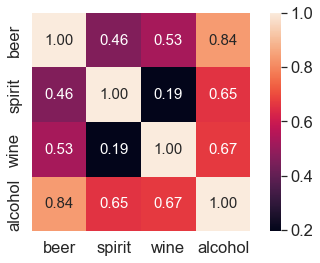

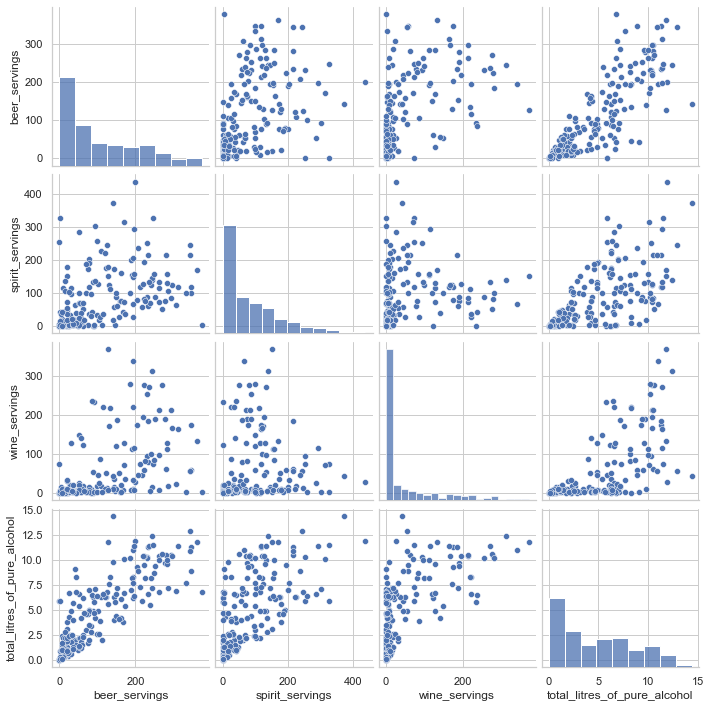

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_view = ['beer','spirit','wine','alcohol'] #그래프 출력을 위한 cols 이름을 축약
sns.set(font_scale =1.5)
hm =sns.heatmap(corr.values,
                cbar =True,
                annot =True,
                square = True,
                fmt ='.2f',
                annot_kws ={'size' : 15},
                yticklabels = cols_view,
                xticklabels = cols_view
)
plt.tight_layout()
plt.show()

sns.set(style ='whitegrid', context = 'notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']], height=2.5)

plt.show()

In [7]:
#결측 데이터가 있는 continent를 -> other ->OT로 통합시켜버림(결측은 그냥 버리거나 아님 채우거나)

drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


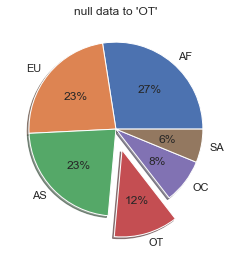

['AF', 'EU', 'AS', 'OT', 'OC', 'SA'] [53, 45, 44, 23, 16, 12] AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64


In [11]:
labels = drinks['continent'].value_counts().index.tolist()
fracsl = drinks['continent'].value_counts().values.tolist()
explode = (0,0,0,0.25,0,0)
plt.pie(fracsl, explode = explode, labels = labels, autopct = '%.0f%%', shadow =True)
plt.title('null data to \'OT\'')
plt.show()


print(labels,fracsl,drinks['continent'].value_counts())

In [12]:
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [19]:
#insight 탐험용

print(len(drinks['country'].unique())) #country
print(len(drinks['continent'].unique())) #continent
print(drinks.groupby('continent').head())




193
6
               country  beer_servings  spirit_servings  wine_servings  \
0          Afghanistan              0                0              0   
1              Albania             89              132             54   
2              Algeria             25                0             14   
3              Andorra            245              138            312   
4               Angola            217               57             45   
5    Antigua & Barbuda            102              128             45   
6            Argentina            193               25            221   
7              Armenia             21              179             11   
8            Australia            261               72            212   
9              Austria            279               75            191   
10          Azerbaijan             21               46              5   
11             Bahamas            122              176             51   
12             Bahrain             42        

In [20]:
#전체 평균보다 많은 알코올을 섭취하는 대륙
total_mean = drinks.total_litres_of_pure_alcohol.mean() # 전체 알코올의 평균 구하기~
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >=total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [21]:
#평균 bear_servings가 가장 높은 대륙을 구합니다.
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


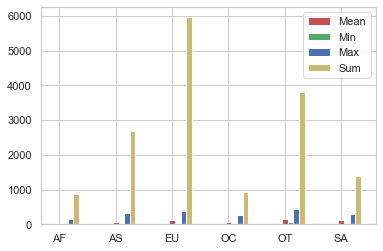

In [27]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화합니다.
n_groups =len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color ='r', label ='Mean')
rects2 = plt.bar(index+bar_width, mins, bar_width, color ='g', label ='Min')
rects3 = plt.bar(index+bar_width*2, maxs, bar_width, color ='b', label ='Max')
rects4 = plt.bar(index+bar_width*3, sums, bar_width, color ='y', label ='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

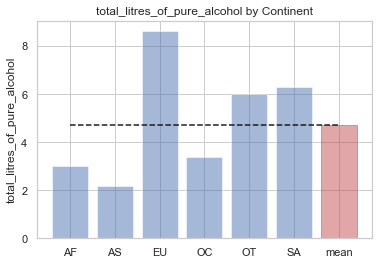

In [28]:
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align = 'center',alpha =0.5)
bar_list[len(continents)-1].set_color('r')
plt.plot([0.,6],[total_mean,total_mean],"k--")
plt.xticks(x_pos,continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()